In [ ]:
!pip install Sastrawi
!pip install wordcloud
!pip install NLTK
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import sklearn
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('/content/mobil_listrik.csv')
df

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif
...,...,...,...,...,...
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif
1515,UgyRNiIV6k2t21V4iMN4AaABAg,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar itu jln x blom d...,netral


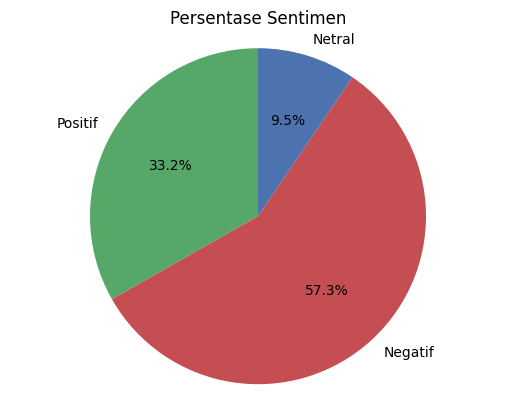

In [ ]:
positif_count = df[df['sentimen'] == 'positif'].shape[0]
negatif_count = df[df['sentimen'] == 'negatif'].shape[0]
netral_count = df[df['sentimen'] == 'netral'].shape[0]

sentimen = [positif_count, negatif_count, netral_count]
labels = ['Positif', 'Negatif', 'Netral']

colors = ['#55a868', '#c44e52', '#4c72b0']

plt.pie(sentimen, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Sentimen')

plt.axis('equal')
plt.show()

##Data Explore


In [ ]:
df.shape

(1517, 5)

In [ ]:
df.columns

Index(['id_komentar', 'nama_akun', 'tanggal', 'text_cleaning', 'sentimen'], dtype='object')

In [ ]:
df.dtypes

id_komentar      object
nama_akun        object
tanggal          object
text_cleaning    object
sentimen         object
dtype: object

In [ ]:
df.count()

id_komentar      1517
nama_akun        1516
tanggal          1517
text_cleaning    1515
sentimen         1517
dtype: int64

In [ ]:
df.duplicated(). sum()


0

In [ ]:
df.isnull(). sum()

id_komentar      0
nama_akun        1
tanggal          0
text_cleaning    2
sentimen         0
dtype: int64

In [ ]:
df.describe()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
count,1517,1516,1517,1515,1517
unique,1517,1515,1514,1514,3
top,Ugzbll5eyrIy3-gdUUJ4AaABAg,Albert,2023-06-06 14:02:09+00:00,mahal,negatif
freq,1,2,2,2,869


##Data Cleaning (Pre-processing)

In [ ]:
df_clean = df.dropna()
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif
...,...,...,...,...,...
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif
1515,UgyRNiIV6k2t21V4iMN4AaABAg,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar itu jln x blom d...,netral


In [ ]:
df_clean.isnull().sum()

id_komentar      0
nama_akun        0
tanggal          0
text_cleaning    0
sentimen         0
dtype: int64

In [ ]:
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif
...,...,...,...,...,...
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif
1515,UgyRNiIV6k2t21V4iMN4AaABAg,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar itu jln x blom d...,netral


In [ ]:
df_clean = df_clean[df_clean['sentimen'] != 'netral']
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif
...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif


In [ ]:
df_clean.drop(columns= {'id_komentar','tanggal'}, axis=0)


,nama_akun,text_cleaning,sentimen
0,Sqn Ldr,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,syarat ngaco woy anak muda blom punya ruma...,negatif
...,...,...,...
1511,Hodijah 1203,untung pabrik,positif
1512,Fish aquspace,apa kabar padahal negri luar biasa dapat negara,negatif
1513,Elias Panai,antar anak sekolah antar bantu pasar klw jau...,negatif
1514,Mikhanalont Horassss,esemka bangga solo,positif


In [ ]:
df_clean = pd.DataFrame(df_clean)

# Daftar kamus singkatan dan kata panjang
kamus_singkatan = {
        'klw': 'kalau',
        'jd': 'jadi',
        'blm': 'belum,',
        'th': 'tahun',
        'rncakan': 'rencanakan',
        'jt': 'juta',
        'listik': 'listrik',
        'hny': 'hanya',
        'jls': 'jelas',
        'kudu': 'harus',
        'bisdis': 'bisnis',
        'fossil': 'fosil',
        'ogah': 'malas',
        'alloh': 'Allah',
        'kendara': 'kendaraan',
        'trus': 'terus',
        'dl': 'dulu',
        'nge cas': 'mengisi',
        'batre': 'baterai',
        'batrai': 'baterai',
        'nge charge': 'mengisi daya',
        'hrga': 'harga',
        'sampe': 'sampai',
        'gt': 'gitu',
        'mw': 'mau',
        'kwalitas' :'kualitas',
        'blom':'belum',
        'iraha' : 'kapan',
        'aing': 'saya',
        'kalau':'jika',
        'kayak' : 'seperti',
        'problem' :'masalah',
        'ngaco' :'gak benar',


    # Tambahkan singkatan lain dan kata panjangnya di sini
}

# Fungsi untuk mengganti singkatan dengan kata panjang
def ganti_singkatan(kalimat, kamus):
    kata_kalimat = kalimat.split()
    kata_baru = [kamus.get(kata.lower(), kata) for kata in kata_kalimat]
    return ' '.join(kata_baru)

# Mengganti singkatan dalam kolom 'text_cleaning'
df_clean['word_changed'] = df_clean['text_cleaning'].apply(lambda x: ganti_singkatan(x, kamus_singkatan))
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,word_changed
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,saran sih bikin harga ionic sama seperti brio ...
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,masalah subsidi kualitas diturunin harga dinai...
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,baik kualitas kembang dulu baik kualitas motor...
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,model jelek kualitas buruk harga mahal croot
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif,syarat gak benar woy anak muda belum punya rum...
...,...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif,untung pabrik
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,apa kabar padahal negri luar biasa dapat negara
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,antar anak sekolah antar bantu pasar kalau jau...
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,esemka bangga solo


#CaseFolding


In [ ]:
df_clean['case_folding'] = df_clean['word_changed'].str.lower()
print('hasil CF: \n')
print(df_clean['case_folding'])
print()

hasil CF: 

0       saran sih bikin harga ionic sama seperti brio ...
1       masalah subsidi kualitas diturunin harga dinai...
2       baik kualitas kembang dulu baik kualitas motor...
3            model jelek kualitas buruk harga mahal croot
4       syarat gak benar woy anak muda belum punya rum...
                              ...                        
1511                                        untung pabrik
1512      apa kabar padahal negri luar biasa dapat negara
1513    antar anak sekolah antar bantu pasar kalau jau...
1514                                   esemka bangga solo
1516    niat beli ev murah malah ikut dinaikin sama pe...
Name: case_folding, Length: 1372, dtype: object



In [ ]:
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,word_changed,case_folding
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,saran sih bikin harga ionic sama seperti brio ...,saran sih bikin harga ionic sama seperti brio ...
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,masalah subsidi kualitas diturunin harga dinai...,masalah subsidi kualitas diturunin harga dinai...
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,baik kualitas kembang dulu baik kualitas motor...,baik kualitas kembang dulu baik kualitas motor...
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,model jelek kualitas buruk harga mahal croot,model jelek kualitas buruk harga mahal croot
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif,syarat gak benar woy anak muda belum punya rum...,syarat gak benar woy anak muda belum punya rum...
...,...,...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif,untung pabrik,untung pabrik
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negri luar biasa dapat negara
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,antar anak sekolah antar bantu pasar kalau jau...,antar anak sekolah antar bantu pasar kalau jau...
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,esemka bangga solo,esemka bangga solo


#Tokenizing


In [ ]:
#setelah dilakukan lower casing berikutnya melakukan tokenisasi (mengubah kalimat menjadi terpisah sehingga menjadi satuan kata)
# tokenized = df_clean['text_cleaning'].apply(lambda x:x.split())
# tokenized
def word_tokenize_wrapper(case_folding):
  return word_tokenize(case_folding)
df_clean['teks_token']=df_clean['case_folding']. apply(word_tokenize_wrapper)
df_clean


,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,word_changed,case_folding,teks_token
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,saran sih bikin harga ionic sama seperti brio ...,saran sih bikin harga ionic sama seperti brio ...,"[saran, sih, bikin, harga, ionic, sama, sepert..."
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,masalah subsidi kualitas diturunin harga dinai...,masalah subsidi kualitas diturunin harga dinai...,"[masalah, subsidi, kualitas, diturunin, harga,..."
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,baik kualitas kembang dulu baik kualitas motor...,baik kualitas kembang dulu baik kualitas motor...,"[baik, kualitas, kembang, dulu, baik, kualitas..."
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,model jelek kualitas buruk harga mahal croot,model jelek kualitas buruk harga mahal croot,"[model, jelek, kualitas, buruk, harga, mahal, ..."
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif,syarat gak benar woy anak muda belum punya rum...,syarat gak benar woy anak muda belum punya rum...,"[syarat, gak, benar, woy, anak, muda, belum, p..."
...,...,...,...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif,untung pabrik,untung pabrik,"[untung, pabrik]"
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negri luar biasa dapat negara,"[apa, kabar, padahal, negri, luar, biasa, dapa..."
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,antar anak sekolah antar bantu pasar kalau jau...,antar anak sekolah antar bantu pasar kalau jau...,"[antar, anak, sekolah, antar, bantu, pasar, ka..."
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,esemka bangga solo,esemka bangga solo,"[esemka, bangga, solo]"


#Stopword

In [ ]:

# from nltk.corpus import stopwords
# nltk.download('stopwords')
# daftar_stopword = stopwords.words('indonesian')

# daftar_stopword.extend(["sih","wkwk","ke","ia","jika","yg","klw"])
# daftar_stopword = set (daftar_stopword)
# def stopwordText(words):
#   return [word for word in words if word not in daftar_stopword]
#   df_clean['text_stopword'] = df_clean['teks_token'].apply (stopwordText)
#   print('stopword:\n')
#   print(df_clean['text_stopword'].head())

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Mengambil daftar stop words bahasa Indonesia
daftar_stopword = stopwords.words('indonesian')

# Menambahkan stop words tambahan
daftar_stopword.extend(["sih", "wkwk", "ke", "ia", "jika", "yg", "klw","woy"])
daftar_stopword = set(daftar_stopword)

# Definisi fungsi untuk menghilangkan stop words
def stopwordText(words):
    return [word for word in words if word not in daftar_stopword]

# Pernyataan untuk mengaplikasikan fungsi stopwordText pada DataFrame
df_clean['text_stopword'] = df_clean['teks_token'].apply(stopwordText)

# Menampilkan hasil stopword
print('stopword:\n')
print(df_clean['text_stopword'].head())

stopword:

0    [saran, bikin, harga, ionic, brio, insya, alla...
1    [subsidi, kualitas, diturunin, harga, dinaikin...
2    [kualitas, kembang, kualitas, motor, motor, pa...
3    [model, jelek, kualitas, buruk, harga, mahal, ...
4    [syarat, gak, anak, muda, rumah, umkm, kur, da...
Name: text_stopword, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,word_changed,case_folding,teks_token,text_stopword
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,saran sih bikin harga ionic sama seperti brio ...,saran sih bikin harga ionic sama seperti brio ...,"[saran, sih, bikin, harga, ionic, sama, sepert...","[saran, bikin, harga, ionic, brio, insya, alla..."
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,masalah subsidi kualitas diturunin harga dinai...,masalah subsidi kualitas diturunin harga dinai...,"[masalah, subsidi, kualitas, diturunin, harga,...","[subsidi, kualitas, diturunin, harga, dinaikin..."
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,baik kualitas kembang dulu baik kualitas motor...,baik kualitas kembang dulu baik kualitas motor...,"[baik, kualitas, kembang, dulu, baik, kualitas...","[kualitas, kembang, kualitas, motor, motor, pa..."
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,model jelek kualitas buruk harga mahal croot,model jelek kualitas buruk harga mahal croot,"[model, jelek, kualitas, buruk, harga, mahal, ...","[model, jelek, kualitas, buruk, harga, mahal, ..."
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif,syarat gak benar woy anak muda belum punya rum...,syarat gak benar woy anak muda belum punya rum...,"[syarat, gak, benar, woy, anak, muda, belum, p...","[syarat, gak, anak, muda, rumah, umkm, kur, da..."
...,...,...,...,...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif,untung pabrik,untung pabrik,"[untung, pabrik]","[untung, pabrik]"
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negri luar biasa dapat negara,"[apa, kabar, padahal, negri, luar, biasa, dapa...","[kabar, negri, negara]"
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,antar anak sekolah antar bantu pasar kalau jau...,antar anak sekolah antar bantu pasar kalau jau...,"[antar, anak, sekolah, antar, bantu, pasar, ka...","[anak, sekolah, bantu, pasar, jebak, macet, ab..."
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,esemka bangga solo,esemka bangga solo,"[esemka, bangga, solo]","[esemka, bangga, solo]"


In [ ]:
!pip install swifter
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from tqdm import tqdm
# import swifter
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()
# def stemmer_wrapper(term):
#     return stemmer.stem(term)

#      term_dict={}

# for document in df_clean ['text_stopword']:
#   for term in document:
#     if term not in term_dict:
#       term_dict [term] = stemmed_wrapper(term)
#       print(term,":", term_dict[term])
#       def stemmingText(document):
#         return [term_dict[term] for term in document]
#         df_clean['Stemmed_word'] = df_clean['text_stopword'].swifter.apply(stemmingText)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmer_wrapper(term):
    return stemmer.stem(term)

# Create a term dictionary for stemming
term_dict = {}

# Function to stem a document
def stemmingText(document):
    return [stemmer_wrapper(term) for term in document]

# Apply the stemmingText function to each document in the DataFrame
df_clean['Stemmed_word'] = df_clean['text_stopword'].swifter.apply(stemmingText)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=bdbb54c541969e57008b03166407d86d74e74e91bb1a4690cee9d52307282f0e
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


Pandas Apply:   0%|          | 0/1372 [00:00<?, ?it/s]

In [ ]:
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,word_changed,case_folding,teks_token,text_stopword,Stemmed_word
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,saran sih bikin harga ionic sama seperti brio ...,saran sih bikin harga ionic sama seperti brio ...,"[saran, sih, bikin, harga, ionic, sama, sepert...","[saran, bikin, harga, ionic, brio, insya, alla...","[saran, bikin, harga, ionic, brio, insya, alla..."
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,masalah subsidi kualitas diturunin harga dinai...,masalah subsidi kualitas diturunin harga dinai...,"[masalah, subsidi, kualitas, diturunin, harga,...","[subsidi, kualitas, diturunin, harga, dinaikin...","[subsidi, kualitas, diturunin, harga, dinaikin..."
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,baik kualitas kembang dulu baik kualitas motor...,baik kualitas kembang dulu baik kualitas motor...,"[baik, kualitas, kembang, dulu, baik, kualitas...","[kualitas, kembang, kualitas, motor, motor, pa...","[kualitas, kembang, kualitas, motor, motor, pa..."
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,model jelek kualitas buruk harga mahal croot,model jelek kualitas buruk harga mahal croot,"[model, jelek, kualitas, buruk, harga, mahal, ...","[model, jelek, kualitas, buruk, harga, mahal, ...","[model, jelek, kualitas, buruk, harga, mahal, ..."
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif,syarat gak benar woy anak muda belum punya rum...,syarat gak benar woy anak muda belum punya rum...,"[syarat, gak, benar, woy, anak, muda, belum, p...","[syarat, gak, anak, muda, rumah, umkm, kur, da...","[syarat, gak, anak, muda, rumah, umkm, kur, da..."
...,...,...,...,...,...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif,untung pabrik,untung pabrik,"[untung, pabrik]","[untung, pabrik]","[untung, pabrik]"
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negri luar biasa dapat negara,"[apa, kabar, padahal, negri, luar, biasa, dapa...","[kabar, negri, negara]","[kabar, negri, negara]"
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,antar anak sekolah antar bantu pasar kalau jau...,antar anak sekolah antar bantu pasar kalau jau...,"[antar, anak, sekolah, antar, bantu, pasar, ka...","[anak, sekolah, bantu, pasar, jebak, macet, ab...","[anak, sekolah, bantu, pasar, jebak, macet, ab..."
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,esemka bangga solo,esemka bangga solo,"[esemka, bangga, solo]","[esemka, bangga, solo]","[esemka, bangga, solo]"


##Visualisasi

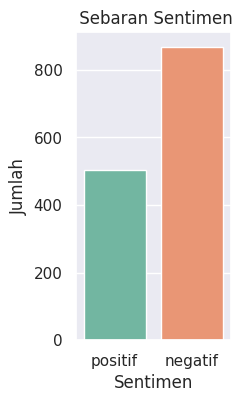

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentimen_counts = df_clean["sentimen"].value_counts()

plt.figure(figsize=(2, 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="sentimen", data=df_clean, palette="Set2")
plt.title(" Sebaran Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")

plt.show()

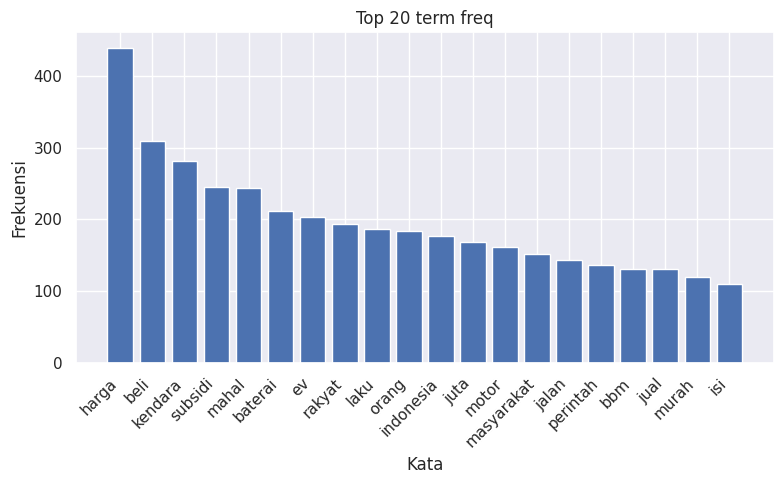

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

text = ' '.join(' '.join(words) for words in df_clean['Stemmed_word'])


word_counts = Counter(text.split())


top_words = word_counts.most_common(20)

words, frequencies = zip(*top_words)

plt.figure(figsize=(8, 5))
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Top 20 term freq')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##persiapan Data

In [ ]:
COL = 'Stemmed_word'
print(COL)
df.shape

Stemmed_word


(1517, 5)

In [ ]:
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,word_changed,case_folding,teks_token,text_stopword,Stemmed_word
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,saran sih bikin harga ionic sama seperti brio ...,saran sih bikin harga ionic sama seperti brio ...,"[saran, sih, bikin, harga, ionic, sama, sepert...","[saran, bikin, harga, ionic, brio, insya, alla...","[saran, bikin, harga, ionic, brio, insya, alla..."
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,masalah subsidi kualitas diturunin harga dinai...,masalah subsidi kualitas diturunin harga dinai...,"[masalah, subsidi, kualitas, diturunin, harga,...","[subsidi, kualitas, diturunin, harga, dinaikin...","[subsidi, kualitas, diturunin, harga, dinaikin..."
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,baik kualitas kembang dulu baik kualitas motor...,baik kualitas kembang dulu baik kualitas motor...,"[baik, kualitas, kembang, dulu, baik, kualitas...","[kualitas, kembang, kualitas, motor, motor, pa...","[kualitas, kembang, kualitas, motor, motor, pa..."
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,model jelek kualitas buruk harga mahal croot,model jelek kualitas buruk harga mahal croot,"[model, jelek, kualitas, buruk, harga, mahal, ...","[model, jelek, kualitas, buruk, harga, mahal, ...","[model, jelek, kualitas, buruk, harga, mahal, ..."
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif,syarat gak benar woy anak muda belum punya rum...,syarat gak benar woy anak muda belum punya rum...,"[syarat, gak, benar, woy, anak, muda, belum, p...","[syarat, gak, anak, muda, rumah, umkm, kur, da...","[syarat, gak, anak, muda, rumah, umkm, kur, da..."
...,...,...,...,...,...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif,untung pabrik,untung pabrik,"[untung, pabrik]","[untung, pabrik]","[untung, pabrik]"
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negri luar biasa dapat negara,"[apa, kabar, padahal, negri, luar, biasa, dapa...","[kabar, negri, negara]","[kabar, negri, negara]"
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,antar anak sekolah antar bantu pasar kalau jau...,antar anak sekolah antar bantu pasar kalau jau...,"[antar, anak, sekolah, antar, bantu, pasar, ka...","[anak, sekolah, bantu, pasar, jebak, macet, ab...","[anak, sekolah, bantu, pasar, jebak, macet, ab..."
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,esemka bangga solo,esemka bangga solo,"[esemka, bangga, solo]","[esemka, bangga, solo]","[esemka, bangga, solo]"


##Encoding Kolom Sentimen

In [ ]:
sentimen_mapping = {"negatif": -1,"positif": 1}

# Melakukan encoding pada kolom "sentimen"
df_clean["sentimen_encoded"] = df_clean["sentimen"].map(sentimen_mapping)


In [ ]:
df_clean

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen,word_changed,case_folding,teks_token,text_stopword,Stemmed_word,sentimen_encoded
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,saran sih bikin harga ionic sama seperti brio ...,saran sih bikin harga ionic sama seperti brio ...,"[saran, sih, bikin, harga, ionic, sama, sepert...","[saran, bikin, harga, ionic, brio, insya, alla...","[saran, bikin, harga, ionic, brio, insya, alla...",1
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,masalah subsidi kualitas diturunin harga dinai...,masalah subsidi kualitas diturunin harga dinai...,"[masalah, subsidi, kualitas, diturunin, harga,...","[subsidi, kualitas, diturunin, harga, dinaikin...","[subsidi, kualitas, diturunin, harga, dinaikin...",-1
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,baik kualitas kembang dulu baik kualitas motor...,baik kualitas kembang dulu baik kualitas motor...,"[baik, kualitas, kembang, dulu, baik, kualitas...","[kualitas, kembang, kualitas, motor, motor, pa...","[kualitas, kembang, kualitas, motor, motor, pa...",1
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif,model jelek kualitas buruk harga mahal croot,model jelek kualitas buruk harga mahal croot,"[model, jelek, kualitas, buruk, harga, mahal, ...","[model, jelek, kualitas, buruk, harga, mahal, ...","[model, jelek, kualitas, buruk, harga, mahal, ...",-1
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif,syarat gak benar woy anak muda belum punya rum...,syarat gak benar woy anak muda belum punya rum...,"[syarat, gak, benar, woy, anak, muda, belum, p...","[syarat, gak, anak, muda, rumah, umkm, kur, da...","[syarat, gak, anak, muda, rumah, umkm, kur, da...",-1
...,...,...,...,...,...,...,...,...,...,...,...
1511,UgwKV4eNnpvkd6NCePx4AaABAg,Hodijah 1203,2022-09-19 14:47:02+00:00,untung pabrik,positif,untung pabrik,untung pabrik,"[untung, pabrik]","[untung, pabrik]","[untung, pabrik]",1
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negri luar biasa dapat negara,"[apa, kabar, padahal, negri, luar, biasa, dapa...","[kabar, negri, negara]","[kabar, negri, negara]",-1
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,antar anak sekolah antar bantu pasar kalau jau...,antar anak sekolah antar bantu pasar kalau jau...,"[antar, anak, sekolah, antar, bantu, pasar, ka...","[anak, sekolah, bantu, pasar, jebak, macet, ab...","[anak, sekolah, bantu, pasar, jebak, macet, ab...",-1
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,esemka bangga solo,esemka bangga solo,"[esemka, bangga, solo]","[esemka, bangga, solo]","[esemka, bangga, solo]",1


##Term Freq

##**TF-IDF**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=3, max_df=0.9, ngram_range=(1, 2))
flat_words = [word for sublist in df_clean['Stemmed_word'].values for word in sublist]
features = tfidf.fit_transform(flat_words)
df_clean_tfidf = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names_out())

In [ ]:
df_clean_tfidf


,abis,ac,adil,agya,ahli,air,airev,ajah,ajar,akal,...,wilayah,woi,work,worth,wuling,xenia,xpander,yah,yamaha,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df_clean_tfidf.shape)

(17120, 1025)


In [ ]:
df_clean_tfidf['y'] = df_clean['sentimen_encoded']

In [ ]:
df_clean_tfidf

,abis,ac,adil,agya,ahli,air,airev,ajah,ajar,akal,...,woi,work,worth,wuling,xenia,xpander,yah,yamaha,zero,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
17116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
17117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
17118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
df_clean_tfidf.dropna(inplace=True)
# df_clean_tfidf_cleaned = df_clean_tfidf.dropna()
# Mengisi nilai NaN dengan nilai median pada kolom tertentu
# median_value = df_clean_tfidf['y'].median()
# df_clean_tfidf['y'].fillna(median_value, inplace=True)
# df_clean_tfidf

In [ ]:
df_clean_tfidf

,abis,ac,adil,agya,ahli,air,airev,ajah,ajar,akal,...,woi,work,worth,wuling,xenia,xpander,yah,yamaha,zero,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##Data Split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_tfidf.drop(['y'], axis=1), df_clean_tfidf[['y']], test_size=0.20, random_state=555)

##**Modelling**

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

k = 2

selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X_train, y_train)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_selected, y_train.values.ravel())

y_pred_nb = naive_bayes_model.predict(selector.transform(X_test))

accuracy_nb = naive_bayes_model.score(selector.transform(X_test), y_test)
print("Accuracy:", accuracy_nb)

print("NB Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

auc_nb = roc_auc_score(y_test, y_pred_nb)
print("NB AUC Score:", auc_nb)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6254545454545455
NB Classification Report:
              precision    recall  f1-score   support

        -1.0       0.63      1.00      0.77       172
         1.0       0.00      0.00      0.00       103

    accuracy                           0.63       275
   macro avg       0.31      0.50      0.38       275
weighted avg       0.39      0.63      0.48       275

Confusion Matrix:
[[172   0]
 [103   0]]
NB AUC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

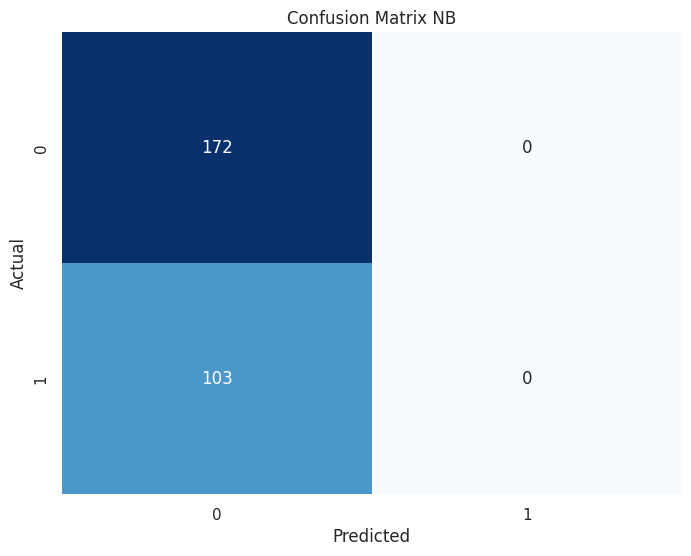

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Menambahkan label pada sel-sel heatmap
# plt.text(0.5, 0.5, f'TP\n{cm[1, 1]}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
# plt.text(0.5, 1.5, f'FN\n{cm[1, 0]}', ha='center', va='center', fontsize=12, color='black', fontweight='bold')
# plt.text(1.5, 0.5, f'FP\n{cm[0, 1]}', ha='center', va='center', fontsize=12, color='black', fontweight='bold')
# plt.text(1.5, 1.5, f'TN\n{cm[0, 0]}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')

plt.title("Confusion Matrix NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##KNN

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train.values.ravel())

knn_y_pred = knn_classifier.predict(X_test_scaled)

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))

knn_auc = roc_auc_score(y_test, knn_y_pred)
print("KNN AUC Score:", knn_auc)



KNN Classification Report:
              precision    recall  f1-score   support

        -1.0       0.70      0.33      0.45       172
         1.0       0.41      0.77      0.53       103

    accuracy                           0.49       275
   macro avg       0.56      0.55      0.49       275
weighted avg       0.59      0.49      0.48       275

KNN Confusion Matrix:
[[ 57 115]
 [ 24  79]]
KNN AUC Score: 0.5491928200496727


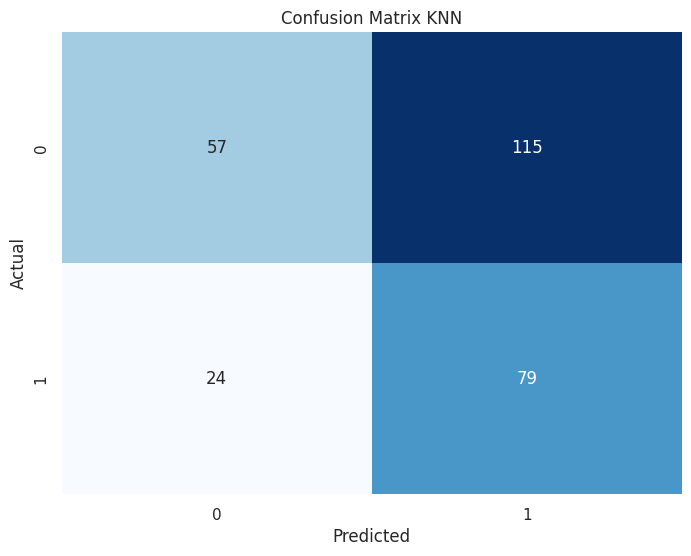

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, knn_y_pred)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Random Forest

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth= None, max_features='auto', max_leaf_nodes=None)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_RF = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)
# Calculate the accuracy of the predictions
print("Classification Report:")
print(classification_report(y_test, y_pred_RF))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_RF))

# AUC Score
auc = roc_auc_score(y_test, y_pred_RF)
print("AUC Score:", auc)


<ipython-input-44-d90501bff4fd>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.64      0.83      0.72       172
         1.0       0.43      0.22      0.29       103

    accuracy                           0.60       275
   macro avg       0.54      0.52      0.51       275
weighted avg       0.56      0.60      0.56       275

Confusion Matrix:
[[142  30]
 [ 80  23]]
AUC Score: 0.5244411831113118


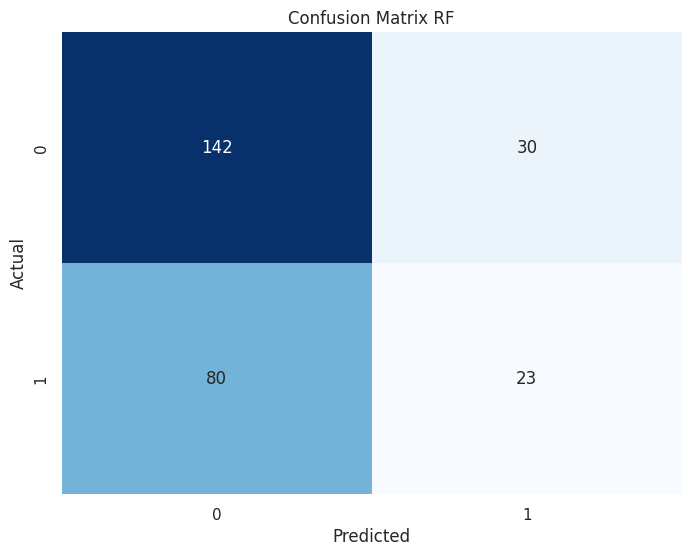

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_RF)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix RF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train.values.ravel())
y_pred_DT = DT.predict(X_test)
# print(rgs.score(X_test, y_test))
accuracy = DT.score(X_test, y_test)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_DT))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_DT))

# AUC Score
auc = roc_auc_score(y_test, y_pred_DT)
print("AUC Score:", auc)


Accuracy: 0.6145454545454545
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.64      0.88      0.74       172
         1.0       0.46      0.17      0.24       103

    accuracy                           0.61       275
   macro avg       0.55      0.52      0.49       275
weighted avg       0.57      0.61      0.55       275

Confusion Matrix:
[[152  20]
 [ 86  17]]
AUC Score: 0.5243847369609392


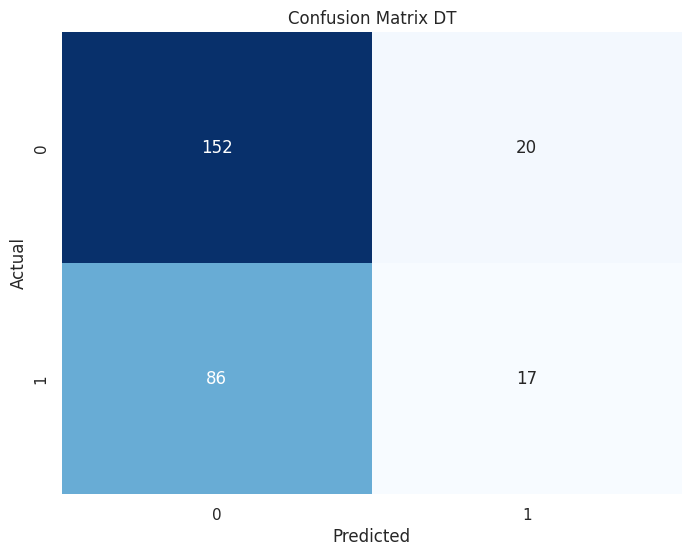

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_DT)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix DT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Logistik Regresi

In [ ]:
from sklearn.linear_model import LogisticRegression
rgs = LogisticRegression(max_iter=600,
                         C=1.65,
                         solver='lbfgs',
                         class_weight='balanced',
                         n_jobs=-1)

rgs.fit(X_train, y_train.values.ravel())
y_pred_LR = rgs.predict(X_test)
# print(rgs.score(X_test, y_test))
accuracy = rgs.score(X_test, y_test)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_LR))

# AUC Score
auc = roc_auc_score(y_test, y_pred_LR)
print("AUC Score:", auc)


Accuracy: 0.5781818181818181
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.64      0.74      0.69       172
         1.0       0.41      0.30      0.35       103

    accuracy                           0.58       275
   macro avg       0.53      0.52      0.52       275
weighted avg       0.56      0.58      0.56       275

Confusion Matrix:
[[128  44]
 [ 72  31]]
AUC Score: 0.5225784601490178


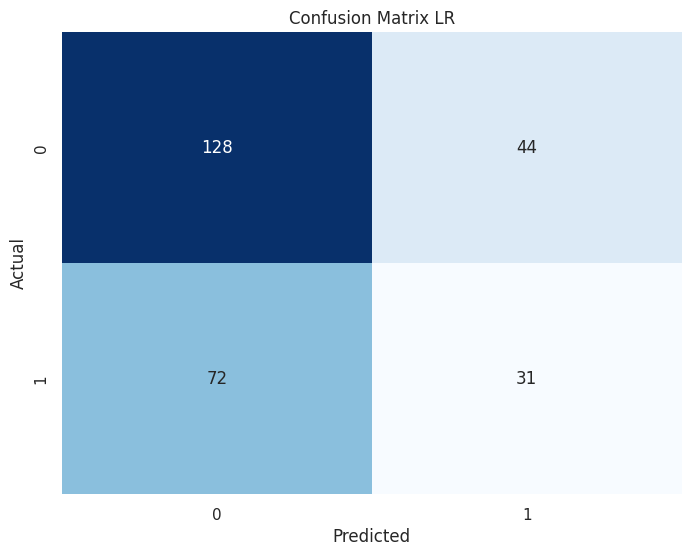

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_LR)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix LR")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()